In [9]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [10]:
df = pd.read_csv("./data/citations_data/thinktank_citations_tdm.csv", index_col=0)
tt_df = pd.read_csv("./data/thinktank_data/thinktank_features.csv", index_col=0)

In [3]:
df['date']=df['date'].apply(lambda x: pd.to_datetime(x))
df['year'] = df['date'].apply(lambda x: x.year)

In [4]:
df['cons'] = df['thinktank'].apply(lambda x: tt_df[tt_df['thinktank']==x]['conservative'].item())
df['lib'] = df['thinktank'].apply(lambda x: tt_df[tt_df['thinktank']==x]['libertarian'].item())

In [5]:
df['cons_lib'] = df.apply(lambda x: max(x.cons, x.lib), axis=1)

In [6]:
panel = df.groupby(['pub', 'year', 'thinktank'])['sentence'].count().reset_index().rename(columns={'sentence':'citations'})

In [7]:
plt.rcParams['font.family'] = 'serif'

# Most Cited Think Tanks

In [20]:
#df.groupby('thinktank')[['title']].count().sort_values(by='title', ascending=False).reset_index().iloc[:20, :]

# Distribution of Citations

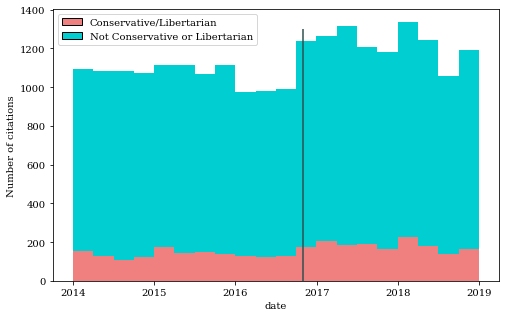

In [44]:
font = {'fontname':'Helvetica'}
# distribution of citations
hist_fig, hist_ax  = plt.subplots(figsize=(8, 5))
cons_years = df[df['cons_lib']==1]['date']
non_cons_years = df[df['cons_lib']==0]['date']
colors=['lightcoral', 'darkturquoise']
hist_ax.set_xlabel('date')
hist_ax.set_ylabel('Number of citations')
hist_ax.hist([cons_years, non_cons_years], stacked=True, color=colors, bins=20)

handles = [Rectangle((0, 0), 1, 1, color=c, ec="k") for c in colors]
hist_ax.legend(handles, ['Conservative/Libertarian', 'Not Conservative or Libertarian']);

half_x = pd.to_datetime("November 2016")
hist_ax.vlines(half_x, ymin=0, ymax=1300, color='darkslategray', linestyle='-')

In [45]:
hist_fig.savefig("./figures/citation_timeseries_by_political_leaning.png", dpi=120)

# Pie Charts of Political Leaning

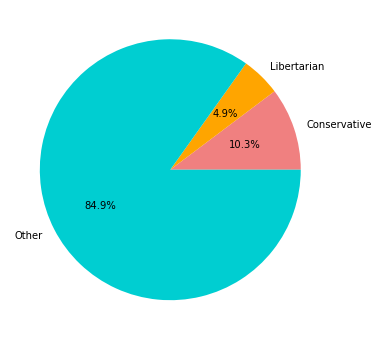

In [133]:
pie_fig, pie_ax = plt.subplots(figsize=(6, 6))
cons_count = df['cons'].sum()
lib_count = df['lib'].sum()
other_count = df.shape[0] - df['cons_lib'].sum()
pie_ax.pie([cons_count, lib_count, other_count], labels=['Conservative', 'Libertarian', 'Other'], 
           colors=['lightcoral', 'orange', 'darkturquoise'], autopct='%1.1f%%');

In [149]:
pie_fig.savefig("./figures/pie_chart_political_leaning.png")

# Topic Distribution

In [13]:
tagged_cite = pd.read_csv("./data/citations_data/thinktank_citations_tagged.csv", index_col=0)

In [14]:
econ_count = tagged_cite.econ_keyword.sum()
edu_count = tagged_cite.edu_keyword.sum()
health_count = tagged_cite.health_keyword.sum()
pol_count = tagged_cite.pol_keyword.sum()

In [24]:
plt.rcParams['font.family'] = 'serif'

Text(0.5, 0, 'Topic')

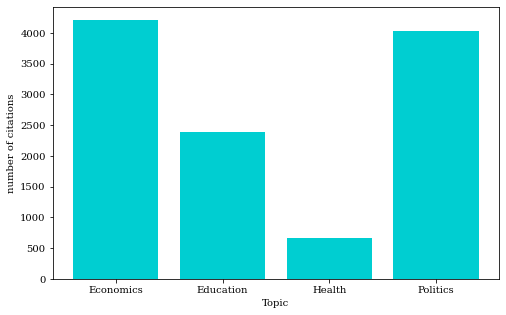

In [27]:
topic_fig, topic_ax = plt.subplots(figsize=(8, 5))
topic_ax.bar(x=['Economics', 'Education', 'Health', 'Politics'], height=[econ_count, edu_count, health_count, pol_count],
       color='darkturquoise')

topic_ax.set_ylabel('number of citations')
topic_ax.set_xlabel('Topic')

In [32]:
topic_fig.savefig("./figures/citation_distribution_by_topic.png", dpi=120)

# Topic Panel EDA

In [3]:
econ_df = pd.read_csv("./data/panels/econ_panel.csv")

In [8]:
econ_df.groupby("thinktank")['num_cites'].count().reset_index().sort_values('num_cites', ascending=False).iloc[:20]

,thinktank,num_cites
91,National Bureau of Economic Research,15
37,Committee for a Responsible Federal Budget,15
102,Peterson Institute for International Economics,15
19,Center for Automotive Research,15
18,Center for American Progress,15
103,Pew Research Center,15
16,Cato Institute,15
34,Center on Budget and Policy Priorities,15
14,Brookings Institution,15
49,Federation for American Immigration Reform,15


In [14]:
tt_df[(tt_df['conservative']==1) | (tt_df['libertarian']==1)]

,thinktank,name1,name2,name3,year_established,conservative,libertarian,special_topic,exp_2014,exp_2015,exp_2016,exp_2017,exp_2018,uni_affiliation,small_org
0,Acton Institute,Acton Institute,NaN,NaN,1990,1.0,1.0,NaN,"9,428,238.00","10,416,484.00","9,987,692.00","10,964,910.00","10,887,803.00",0,0
1,Allegheny Institute for Public Policy,Allegheny Institute for Public Policy,NaN,NaN,1995,1.0,0.0,NaN,"480,762.00","499,346.00","523,377.00","592,413.00","595,987.00",0,0
2,American Action Forum,American Action Forum,AAF,NaN,2009,1.0,0.0,NaN,"4,878,999.00","5,145,811.00","5,351,985.00","4,863,097.00","3,942,490.00",0,0
3,American Civil Rights Union,American Civil Rights Union,NaN,NaN,1998,1.0,0.0,NaN,"84,257,642.00","84,257,642.00","84,257,642.00","120,961,465.00","120,961,465.00",0,0
4,American College of Pediatricians,American College of Pediatricians,NaN,NaN,2002,1.0,0.0,NaN,"88,011.00","78,761.00","86,663.00","95,100.00","121,269.00",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,Discovery Institute,Discovery Institute,NaN,NaN,1990,1.0,0.0,NaN,"4,577,829.00","4,235,611.00","5,325,118.00","5,886,423.00","6,303,202.00",0,0
212,Property and Environment Research Center (PERC),Property and Environment Research Center,PERC,NaN,1980,0.0,1.0,NaN,"2,269,589.00","2,269,589.00","2,269,589.00","2,350,441.00","2,431,293.00",0,0
218,Center for Family and Human Rights,Center for Family and Human Rights,NaN,NaN,1997,1.0,0.0,NaN,"1,648,441.00","1,791,715.00","1,755,829.00","1,525,155.00","1,318,362.00",0,0
219,Center for Excellence in Higher Education,Center for Excellence in Higher Education,NaN,NaN,2007,0.0,1.0,NaN,"161,921,960.00","172,475,209.00","176,238,510.00","184,139,858.00","197,915,389.00",0,0
